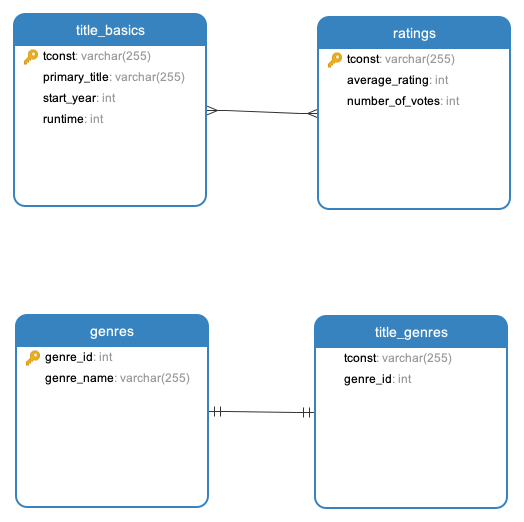

In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json
import sqlalchemy

In [2]:
basics_df = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/Movie-Database/Data/preprocessed_movie_data.csv')
basics_df.head()

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,61114,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,67666,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,81515,tt0083324,movie,The White Lions,The White Lions,0,NaN,NaN,97,Drama
4,86793,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"


In [3]:
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      84548 non-null  int64  
 1   tconst          84548 non-null  object 
 2   titleType       84548 non-null  object 
 3   primaryTitle    84548 non-null  object 
 4   originalTitle   84548 non-null  object 
 5   isAdult         84548 non-null  int64  
 6   startYear       81889 non-null  float64
 7   endYear         0 non-null      float64
 8   runtimeMinutes  84548 non-null  int64  
 9   genres          83066 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.5+ MB


# Extract and normalize genres column
- convert the single string of genres from basics_df into 2 new tables
    - "title_genres" with the columns:
        - "tconst" (movie id)
        - "genre_id" (int id)
    - "genres" with the columns:
        - "genre_id" (int id)
        - "genre_name" (full name of genre)

In [4]:
basics_df['genres'].head()

0    Comedy,Fantasy,Romance
1                     Drama
2                     Drama
3                     Drama
4      Comedy,Horror,Sci-Fi
Name: genres, dtype: object

In [5]:
basics_df['genres'].value_counts()

Drama                          16463
Comedy                          6810
Horror                          3931
Comedy,Drama                    3803
Drama,Romance                   2481
                               ...  
Animation,Biography,Sport          1
Adventure,History,Music            1
Adventure,History,War              1
Drama,Musical,Sport                1
Mystery,Reality-TV,Thriller        1
Name: genres, Length: 851, dtype: int64

In [6]:
# Drop rows with null values in runtimeMinutes
basics_df = basics_df.dropna(subset='genres')
basics_df

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,61114,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,67666,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,81515,tt0083324,movie,The White Lions,The White Lions,0,NaN,NaN,97,Drama
4,86793,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...
84542,10016149,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019.0,NaN,74,Drama
84544,10016544,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,NaN,97,"Comedy,Drama,Fantasy"
84545,10016684,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama
84546,10016693,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller"


In [7]:
basics_df['genres_split'] = basics_df['genres'].str.split(',')
basics_df

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_split
0,34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance","[Comedy, Fantasy, Romance]"
1,61114,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama,[Drama]
2,67666,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama,[Drama]
3,81515,tt0083324,movie,The White Lions,The White Lions,0,NaN,NaN,97,Drama,[Drama]
4,86793,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi","[Comedy, Horror, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...
84542,10016149,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019.0,NaN,74,Drama,[Drama]
84544,10016544,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,NaN,97,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"
84545,10016684,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama,[Drama]
84546,10016693,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller","[Action, Adventure, Thriller]"


In [8]:
exploded_genres = basics_df.explode('genres_split')
exploded_genres

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_split
0,34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance",Comedy
0,34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance",Fantasy
0,34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance",Romance
1,61114,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama,Drama
2,67666,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama,Drama
...,...,...,...,...,...,...,...,...,...,...,...
84546,10016693,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller",Action
84546,10016693,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller",Adventure
84546,10016693,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller",Thriller
84547,10016777,tt9916362,movie,Coven,Akelarre,0,2020.0,NaN,92,"Drama,History",Drama


In [9]:
genres_split = basics_df['genres'].str.split(',')

In [10]:
genres_split

0           [Comedy, Fantasy, Romance]
1                              [Drama]
2                              [Drama]
3                              [Drama]
4             [Comedy, Horror, Sci-Fi]
                     ...              
84542                          [Drama]
84544         [Comedy, Drama, Fantasy]
84545                          [Drama]
84546    [Action, Adventure, Thriller]
84547                 [Drama, History]
Name: genres, Length: 83066, dtype: object

In [11]:
unique_genres = genres_split.explode().unique()
unique_genres

array(['Comedy', 'Fantasy', 'Romance', 'Drama', 'Horror', 'Sci-Fi',
       'Action', 'Biography', 'Family', 'Mystery', 'Adventure', 'Music',
       'Crime', 'Thriller', 'History', 'Animation', 'Sport', 'Adult',
       'War', 'Musical', 'Western', 'Reality-TV', 'News', 'Talk-Show',
       'Game-Show'], dtype=object)

In [12]:
basics_df['genres'].isna().sum()

0

In [13]:
unique_genres = sorted(exploded_genres['genres_split'].unique())

In [14]:
# Create new title_genres tables
title_genres = exploded_genres[['tconst', 'genres_split']].copy()
title_genres.head()

,tconst,genres_split
0,tt0035423,Comedy
0,tt0035423,Fantasy
0,tt0035423,Romance
1,tt0062336,Drama
2,tt0069049,Drama


In [15]:
# Create a genre mapper dictionary to replace string genres with integers
genre_ints = range(len(unique_genres))
genre_map = dict(zip(unique_genres, genre_ints))
genre_map

{'Action': 0,
 'Adult': 1,
 'Adventure': 2,
 'Animation': 3,
 'Biography': 4,
 'Comedy': 5,
 'Crime': 6,
 'Drama': 7,
 'Family': 8,
 'Fantasy': 9,
 'Game-Show': 10,
 'History': 11,
 'Horror': 12,
 'Music': 13,
 'Musical': 14,
 'Mystery': 15,
 'News': 16,
 'Reality-TV': 17,
 'Romance': 18,
 'Sci-Fi': 19,
 'Sport': 20,
 'Talk-Show': 21,
 'Thriller': 22,
 'War': 23,
 'Western': 24}

In [16]:
genre_id_map = dict(zip(unique_genres, range(len(unique_genres))))
genre_id_map

{'Action': 0,
 'Adult': 1,
 'Adventure': 2,
 'Animation': 3,
 'Biography': 4,
 'Comedy': 5,
 'Crime': 6,
 'Drama': 7,
 'Family': 8,
 'Fantasy': 9,
 'Game-Show': 10,
 'History': 11,
 'Horror': 12,
 'Music': 13,
 'Musical': 14,
 'Mystery': 15,
 'News': 16,
 'Reality-TV': 17,
 'Romance': 18,
 'Sci-Fi': 19,
 'Sport': 20,
 'Talk-Show': 21,
 'Thriller': 22,
 'War': 23,
 'Western': 24}

# replace the string genres in title_genres with new integet ids
- create a new genre_id column using the genre_map dicgtionary
- drop genres_split column

In [17]:
basics_df['genre_id'] = basics_df['genres_split'].replace(genre_map)
basics_df

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_split,genre_id
0,34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance","[Comedy, Fantasy, Romance]","[Comedy, Fantasy, Romance]"
1,61114,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama,[Drama],[Drama]
2,67666,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama,[Drama],[Drama]
3,81515,tt0083324,movie,The White Lions,The White Lions,0,NaN,NaN,97,Drama,[Drama],[Drama]
4,86793,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi","[Comedy, Horror, Sci-Fi]","[Comedy, Horror, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...,...
84542,10016149,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019.0,NaN,74,Drama,[Drama],[Drama]
84544,10016544,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,NaN,97,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]","[Comedy, Drama, Fantasy]"
84545,10016684,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama,[Drama],[Drama]
84546,10016693,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller","[Action, Adventure, Thriller]","[Action, Adventure, Thriller]"


In [18]:
basics_df = basics_df.drop(columns = 'genres_split')

In [19]:
basics_df

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre_id
0,34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance","[Comedy, Fantasy, Romance]"
1,61114,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama,[Drama]
2,67666,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama,[Drama]
3,81515,tt0083324,movie,The White Lions,The White Lions,0,NaN,NaN,97,Drama,[Drama]
4,86793,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi","[Comedy, Horror, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...
84542,10016149,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019.0,NaN,74,Drama,[Drama]
84544,10016544,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,NaN,97,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"
84545,10016684,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama,[Drama]
84546,10016693,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller","[Action, Adventure, Thriller]"


In [20]:
genre_lookup = pd.DataFrame({'Genre_Name': genre_id_map.keys(), 'Genre_ID':genre_id_map.values()})
genre_lookup.head()

,Genre_Name,Genre_ID
0,Action,0
1,Adult,1
2,Adventure,2
3,Animation,3
4,Biography,4


# Creating mysql tables with a primary key using python

In [21]:
basics_df.dtypes

Unnamed: 0          int64
tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear         float64
endYear           float64
runtimeMinutes      int64
genres             object
genre_id           object
dtype: object

In [22]:
from sqlalchemy.types import *

# get max string length for object
key_len = tmdb['imdb_id'].fillna('').map(len).max()
cert_len = basics_df['certification'].fillna('').map(len).max()

# create schema dictionary using sqlalchemy datatype objects
df_schema = {
    "imdb_id": CHAR(key_len+1),
    "budget": FLOAT(),
    "revenue": FLOAT().
    "certification":CHAR(key_len+1)}
tmdb.to_sql('tmdb_data', conn, dtypes=df_schema, if_exists='replace', index=False)

SyntaxError: invalid syntax (3612167028.py, line 12)